In [1]:
import google.colab
google.colab.drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [6]:
import dlib
import cv2
import numpy as np
import os

In [3]:
model_dir = '/content/gdrive/MyDrive/Facultate Informatica/Profesor/2024 - 2025/Biometrie/Curs/ColabMount/Models/Landmarks'

In [12]:
print("Incarcati o imagine de test")
uploaded_test_image = files.upload()  # Allows user to upload a file
# Get the first uploaded file
uploaded_test_image_1_path = list(uploaded_test_image_1.keys())[0]

Incarcati o imagine de test


Saving pexels-eric-campbell-2150975659-31431920.jpg to pexels-eric-campbell-2150975659-31431920.jpg


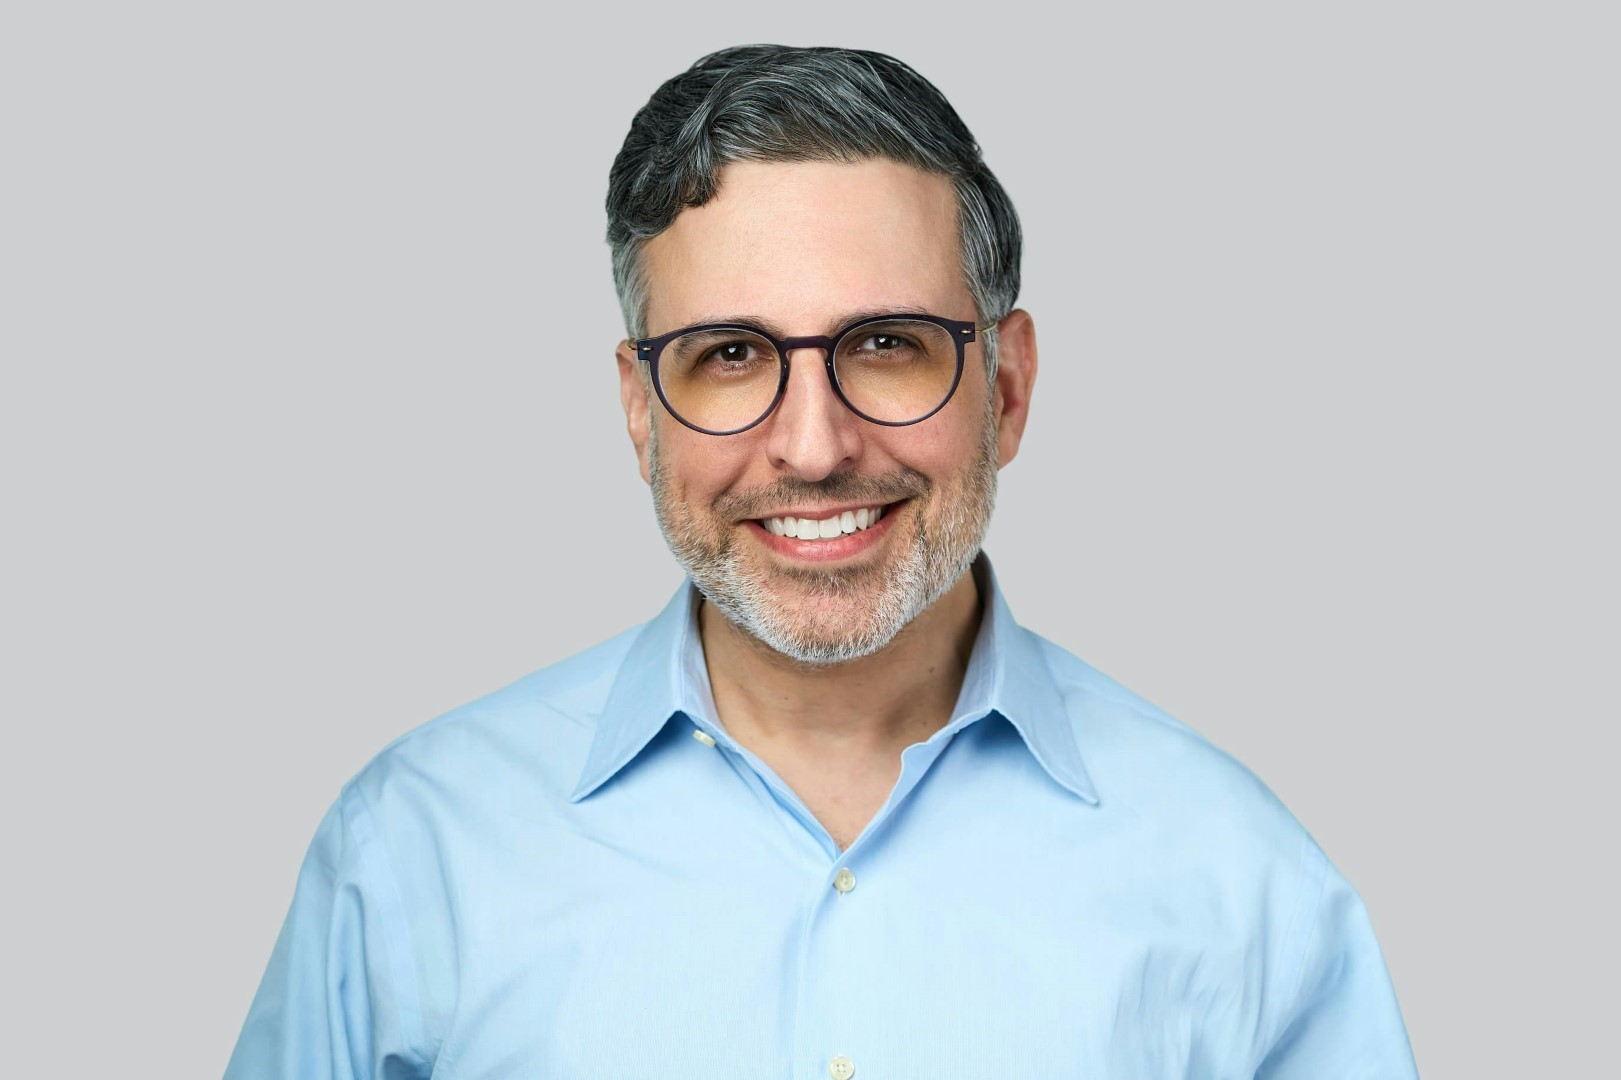

In [13]:
img = cv2.imread(uploaded_test_image_path)
cv2_imshow(img)

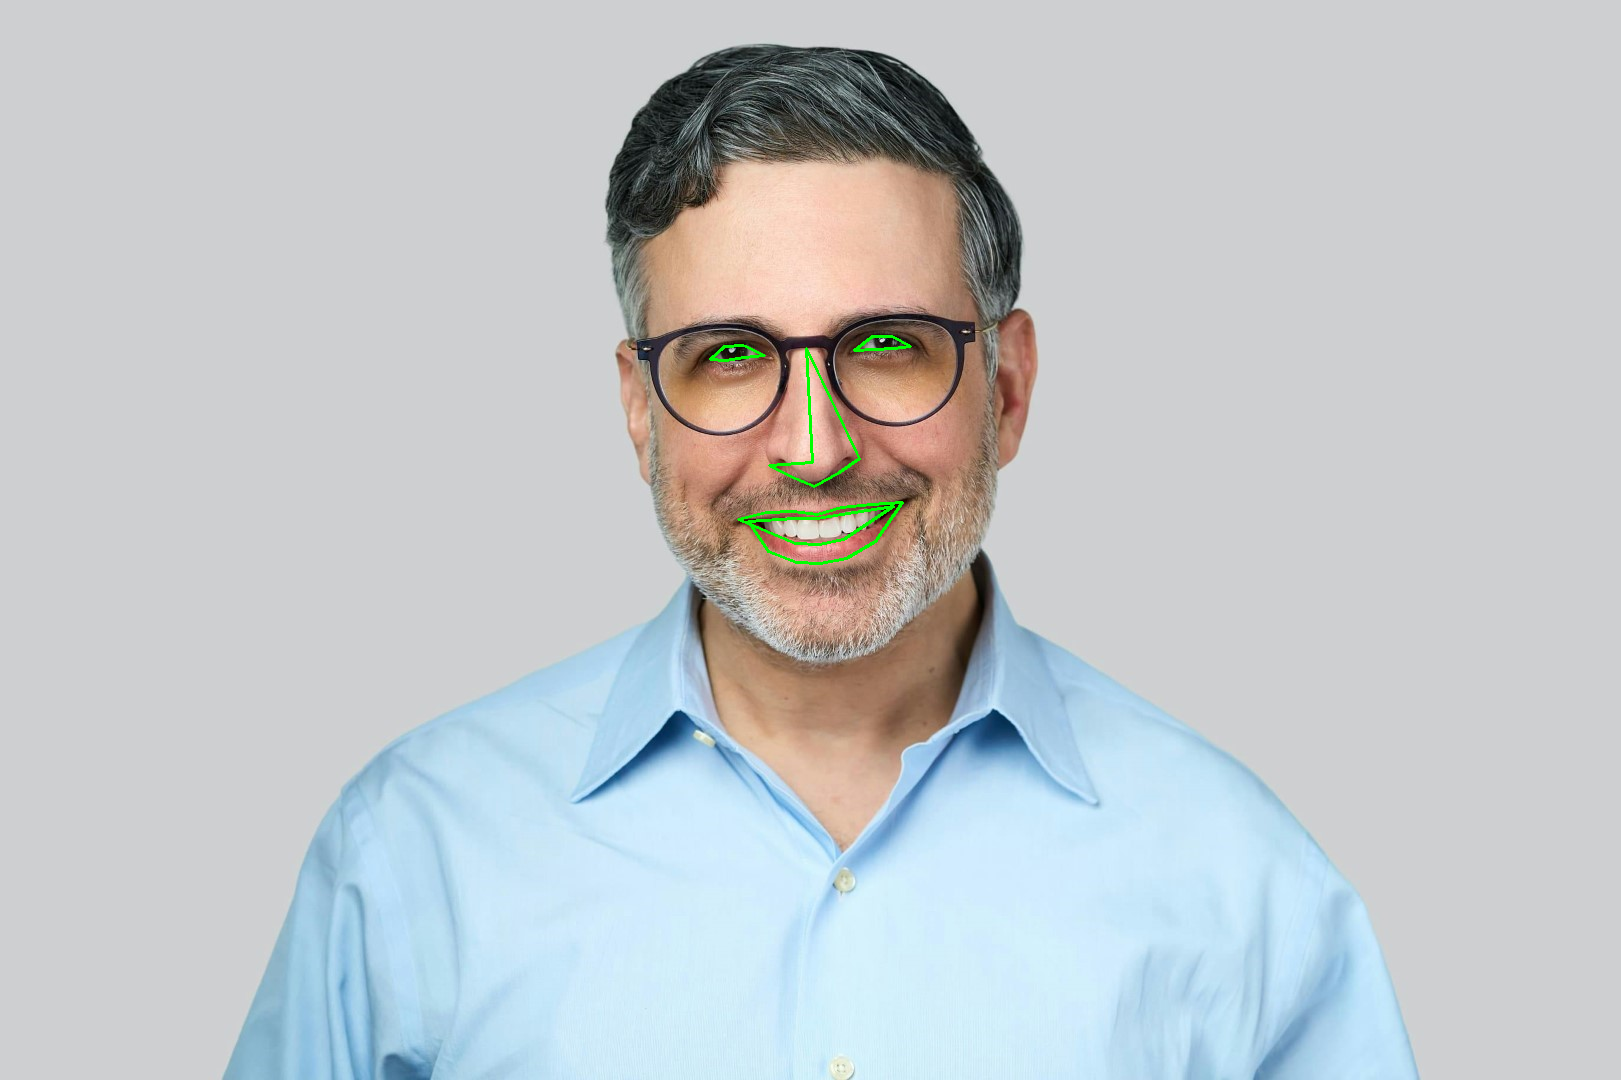

In [14]:
model_file = os.path.join(model_dir, 'shape_predictor_68_face_landmarks.dat')
if os.path.isfile(model_file):

  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(model_file)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = detector(gray)

  for face in faces:
      landmarks = predictor(gray, face)

      # Get landmarks as tuples
      points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(68)]

      # Draw lines connecting the points for the eyes, nose, and mouth
      # Draw lines for left eye (36-41)
      cv2.polylines(img, [np.array(points[36:42], dtype=np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

      # Draw lines for right eye (42-47)
      cv2.polylines(img, [np.array(points[42:48], dtype=np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

      # Draw lines for the nose contour (27-35)
      cv2.polylines(img, [np.array(points[27:36], dtype=np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

      # Draw lines for mouth contour (48-67)
      cv2.polylines(img, [np.array(points[48:68], dtype=np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

cv2_imshow(img)